In [130]:
# Disable warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import math
from math import sqrt
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from pydataset import data

# Evaluating Regression Models Exercises

1. Load the tips dataset from either pydataset or seaborn

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

        Here is some sample code to get you started:
    
            from sklearn.linear_model import LinearRegression
    
         ### assuming X and y are already defined ###
    
            model = LinearRegression().fit(X, y)
    
            predictions = model.predict(X)
    
            Modify and add to the code above as necessary for it to work with the tips dataset.

In [6]:
# create a baseline column, our baseline is the average of our y target

tips['baseline'] = tips.tip.mean()

In [7]:
# create our linear regression model and fit it

model = LinearRegression().fit(tips[['total_bill']], tips[['tip']])

In [8]:
# create our prediction column (prediction of tips)\

tips['yhat'] = model.predict(tips[['total_bill']])

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


3. Plot the residuals for the linear regression model that you made.

In [10]:
# create a residual column

tips['residual'] = tips['yhat'] - tips['tip']

In [11]:
# create a residual baseline column

tips['residual_baseline'] = tips['baseline'] - tips['tip']

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


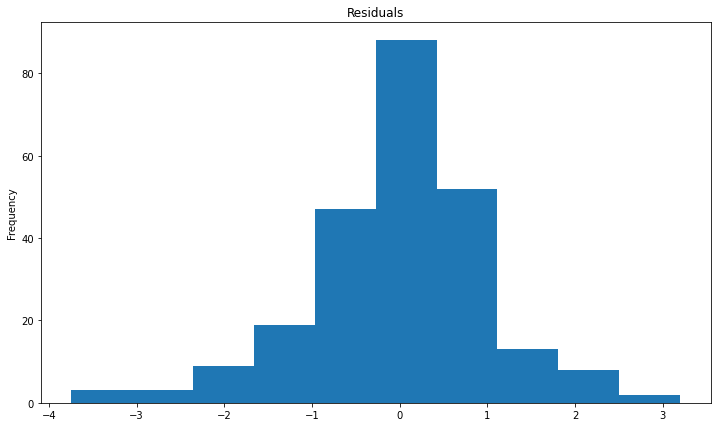

In [13]:
# plot residuals

plt.figure(figsize=(12,7))
tips.residual.plot.hist()
plt.title('Residuals')
plt.show()

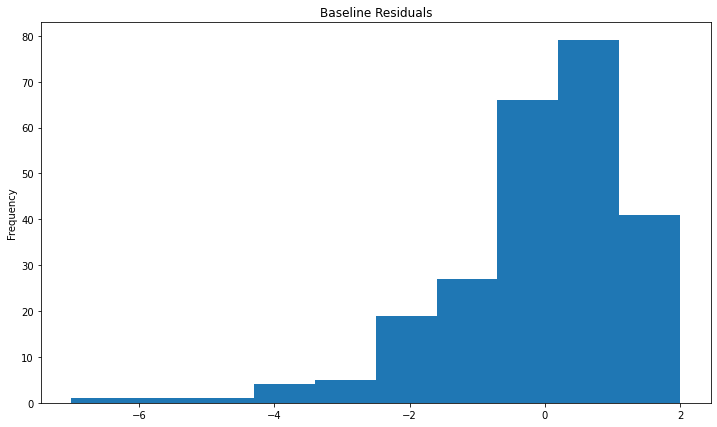

In [14]:
# plot baseline residuals

plt.figure(figsize=(12,7))
tips.residual_baseline.plot.hist()
plt.title('Baseline Residuals')
plt.show()

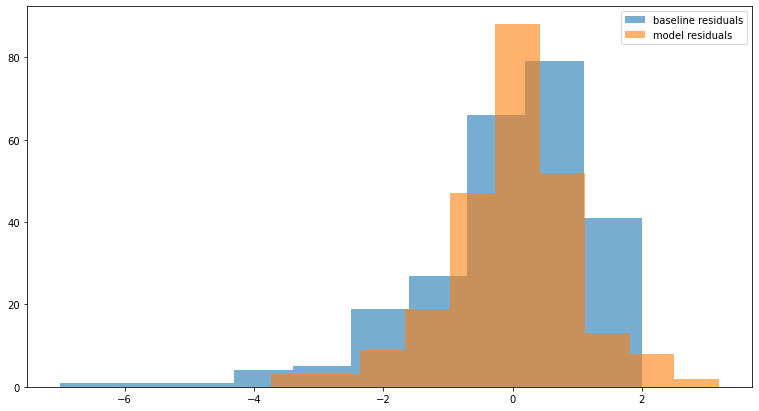

In [15]:
fig, ax = plt.subplots(figsize=(13,7))

ax.hist(tips.residual_baseline, label = 'baseline residuals', alpha = .6) # alpha = transparancy
ax.hist(tips.residual, label = 'model residuals', alpha = .6)
ax.legend()

plt.show()

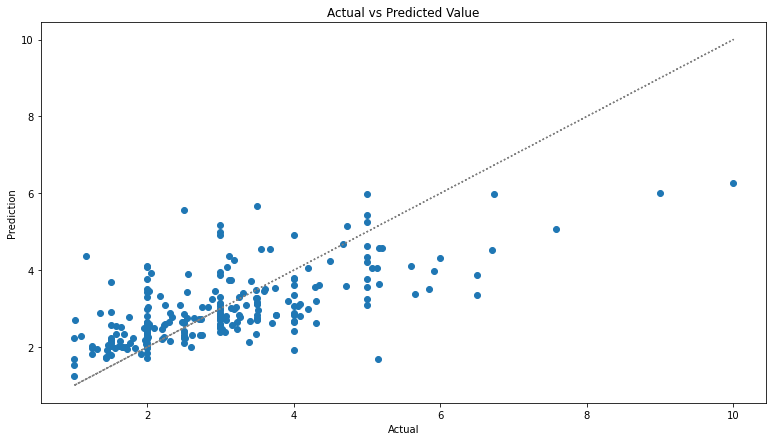

In [19]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(tips.tip, tips.yhat, label='predicted')
ax.set(title='Actual vs Predicted Value', ylabel='Prediction', xlabel='Actual')
ax.plot(tips.tip, tips.tip, ls=':', c='gray')

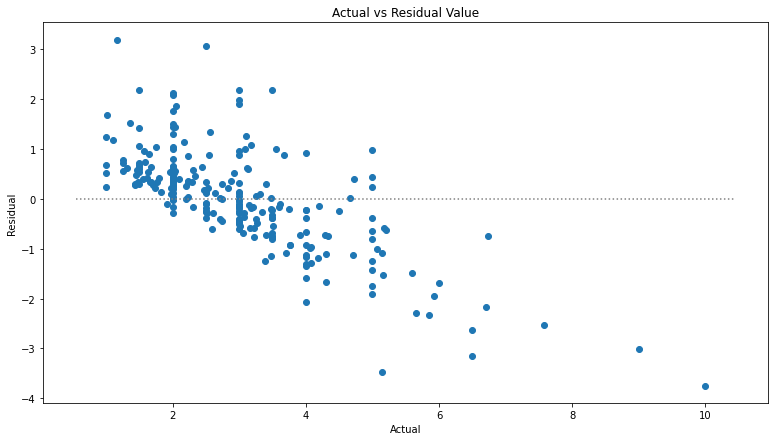

In [23]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.scatter(tips.tip, tips.residual)
ax.set(title='Actual vs Residual Value',ylabel='Residual', xlabel='Actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model

Combined answers question 4 and 5

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [87]:
# sum of squared errors (SSE) aka residual sum of squares (RSS)

# first create a column for residual^2

tips['residual^2'] = tips.residual ** 2

# then create a column for residual_baseline^2

tips['residual_baseline^2'] = tips.residual_baseline ** 2

In [49]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721,0.011487,0.374203


In [50]:
# now to SSE

SSE = sum(tips['residual^2'])

SSE_baseline = sum(tips['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  252.78874385077597
SSE - baseline =  465.21247704918085


we see our model is performing better than our baseline

In [51]:
# compute Mean Squared Error (MSE) by using SSE

MSE = SSE/len(tips)

MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.0360194420113769
MSE baseline =  1.9066085124966428


model is performing slightly better than the baseline

In [72]:
# compute Room Mean Squared Error (RMSE)

RMSE = sqrt(MSE)

RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298958


- model is off by 1.02 while the baseline is off by 1.38. 
- model is still performing better than having no model

In [77]:
# compute explained sum of squares and total sum of squares

ESS = sum((tips.yhat - tips.tip.mean())**2)
TSS = sum((tips.tip - tips.tip.mean())**2)

print("ESS = ", ESS)
print("TSS = ", TSS)

ESS =  212.42373319840416
TSS =  465.21247704918085


In [78]:
# compute explained variance

R2 = ESS / TSS
R2

0.45661658635167557

In [79]:
# using sklearn to do the above

evs = explained_variance_score(tips.tip, tips.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


In [88]:
# comparing to baseline

ess = sum((tips.baseline - tips.tip.mean())**2)
tss = sum((tips.tip - tips.tip.mean())**2)

print('ess: %.4f' % ess)

ess / tss

ess: 0.0000


0.0

In [92]:
# baseline score - done with import

r2_score(tips.tip, tips.baseline)

1.1102230246251565e-16

sklearn methods to compute all the above

In [81]:
# SSE method comparison to manual 

SSE2 = mean_squared_error(tips.tip, tips.yhat)*len(tips)
SSE2_baseline = mean_squared_error(tips.tip, tips.baseline)*len(tips)

print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2_baseline)

SSE manual == SSE sklearn:  False
SSE manual - baseline == SSE sklearn - baseline:  False


In [82]:
MSE2 = mean_squared_error(tips.tip, tips.yhat)*len(tips)
MSE2_baseline = mean_squared_error(tips.tip, tips.baseline)*len(tips)

print("MSE manual == MSE sklearn: ", MSE == MSE2) 
print("MSE manual - baseline == MSE sklearn - baseline: ", MSE_baseline == MSE2_baseline)

MSE manual == MSE sklearn:  False
MSE manual - baseline == MSE sklearn - baseline:  False


In [83]:
RMSE2 = sqrt(mean_squared_error(tips.tip, tips.yhat))
RMSE2_baseline = sqrt(mean_squared_error(tips.tip, tips.baseline))

print("RMSE manual == RMSE skearn: ", RMSE == RMSE2) 
print("RMSE manual - baseline == RMSE skearn - baseline: ", RMSE_baseline == RMSE2_baseline)


RMSE manual == RMSE skearn:  True
RMSE manual - baseline == RMSE skearn - baseline:  False


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [94]:
if SSE < SSE_baseline:
    print('Our model performs better than the SSE_baseline')
else:
    print('The SSE_baseline performs better than our model')

Our model performs better than the SSE_baseline


7. What is the amount of variance explained in your model?

In [85]:
# done manually

R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.457
Percent of variance in y explained by x =  45.7 %


In [86]:
# OR done through sklearn

evs = explained_variance_score(tips.tip, tips.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


8. Is your model better than the baseline model?

In [93]:
if RMSE < RMSE_baseline:
    print('Our model performs better than the RMSE_baseline')
else:
    print('The RMSE_baseline performs better than our model')

Our model performs better than the RMSE_baseline


9. Create a file named evaluate.py that contains the following functions.

    - plot_residuals(y, yhat): creates a residual plot
    - regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
    - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [161]:
def plot_residuals(df, y, yhat):
    '''
    This function takes in a dataframe, the y target variable 
    and the yhat (model predictions) and creates columns for residuals
    and baseline residuals. It returns a graph of both residual columns.
    ''' 
    
    # create a residual column
    df['residual'] = (yhat - y)

    # create a residual baseline column
    df['residual_baseline'] = (y.mean() - y)
    
    fig, ax = plt.subplots(figsize=(13,7))

    ax.hist(df.residual_baseline, label='baseline residuals', alpha=.6)
    ax.hist(df.residual, label='model residuals', alpha=.6)
    ax.legend()

    plt.show()

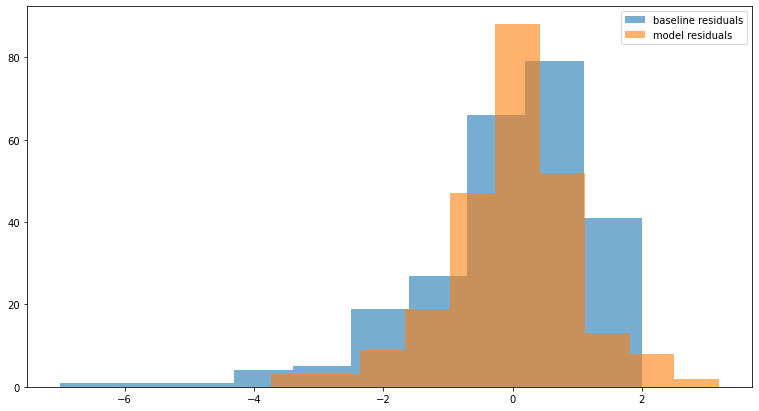

In [162]:
plot_residuals(tips, tips.tip, tips.yhat)

In [181]:
def regression_errors(df, y, yhat):
    
    SSE = mean_squared_error(y, yhat)*len(df)
    
    MSE = mean_squared_error(y, yhat)
    
    RMSE = sqrt(mean_squared_error(y, yhat))

    ESS = sum((yhat - y.mean())**2)
    
    TSS = sum((y - y.mean())**2)

    # compute explained variance
    R2 = ESS / TSS
    
    print('SSE is:', SSE)
    print('ESS is:', ESS)
    print('TSS is:', TSS)
    print('R2 is:', R2)
    print('MSE is:', MSE)
    print('RMSE is:', RMSE)

In [182]:
regression_errors(tips, tips.tip, tips.yhat)

SSE is: 252.788743850776
ESS is: 212.42373319840416
TSS is: 465.21247704918085
R2 is: 0.45661658635167557
MSE is: 1.036019442011377
RMSE is: 1.0178504025697377


In [168]:
def baseline_mean_errors(df, y, yhat_baseline):
    
    SSE_baseline = mean_squared_error(y, yhat_baseline)*len(df)
    
    MSE_baseline = mean_squared_error(y, yhat_baseline)
    
    RMSE_baseline = sqrt(mean_squared_error(y, yhat_baseline))
    
    
    print('Baseline SSE is:', SSE_baseline)
    print('Baseline MSE is:', MSE_baseline)
    print('Baseline RMSE is:', RMSE_baseline)

In [169]:
baseline_mean_errors(tips, tips.tip, tips.baseline)

Baseline SSE is: 465.2124770491804
Baseline MSE is: 1.906608512496641
Baseline RMSE is: 1.3807999538298954


In [170]:
def better_than_baseline(df, y, yhat, yhat_baseline):

        RMSE = sqrt(mean_squared_error(y, yhat))
    
        RMSE_baseline = sqrt(mean_squared_error(y, yhat_baseline))
        
        if RMSE < RMSE_baseline:
            print('True - The model performs better than the baseline')
            
        elif RMSE > RMSE_baseline:
            print('False - The baseline performs better than the model')
        
        return RMSE, RMSE_baseline

In [171]:
better_than_baseline(tips, tips.tip, tips.yhat, tips.baseline)

True - The model performs better than the baseline


(1.0178504025697377, 1.3807999538298954)

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [133]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [134]:
model = LinearRegression().fit(mpg[['displ']], mpg.hwy)

In [178]:
#Establish a baseline

mpg['yhat_baseline'] = mpg.hwy.mean()

In [135]:
# y

actual = mpg.hwy 

# yhat

predicted = model.predict(mpg[['displ']])

In [136]:
#y
#use the model

mpg['actual'] = mpg['hwy']

In [137]:
#yhat

mpg['predicted'] = model.predict(mpg[['displ']])

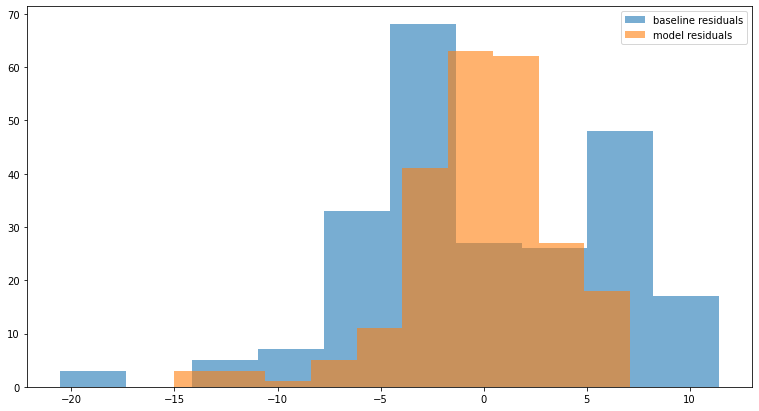

In [172]:
#use function created

plot_residuals(mpg, mpg.actual, mpg.predicted)

In [174]:
#use function created

regression_errors(mpg, mpg.actual, mpg.predicted)

SSE is: 3413.829008995467
ESS is: 4847.833384166925
TSS is: 8261.662393162384
R2 is: 0.5867866723989045
MSE is: 14.589012858954987
RMSE is: 3.8195566312014524


In [176]:
#use function created

baseline_mean_errors(mpg, mpg.actual, mpg.predicted)

Baseline SSE is: 3413.829008995467
Baseline MSE is: 14.589012858954987
Baseline RMSE is: 3.8195566312014524


In [180]:
#use function created

better_than_baseline(mpg, mpg.actual, mpg.predicted, mpg.yhat_baseline)

True - The model performs better than the baseline


(3.8195566312014524, 5.941906221359356)